In [20]:
import pandas as pd
from dlc_tools.freeze_detect import detect_freezes
from dlc_tools.tidy_trajectory import load_dlc_h5_file
from dlc_tools.video import save_anotated_video
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [21]:
p = Path(r"D:\pilot\data\proper\B46839\D1Afternoon\cylander_behaviour\exports\B46839_1_14_2021_noon1_condition_two_videoDLC_resnet50_pilotApr21shuffle1_200000.h5")

In [22]:
df = load_dlc_h5_file(p)

In [23]:
df

,frame,left_ear_x,left_ear_y,right_ear_x,right_ear_y,tail_x,tail_y,motion,freeze
0,0,319.343384,354.869843,302.637451,352.318451,326.293823,301.733734,NaN,0
1,1,320.019409,353.804230,303.008301,350.671570,327.151886,301.728363,0.767044,0
2,2,319.777161,353.084106,303.703247,349.111115,326.913605,301.245758,0.588776,0
3,3,319.523529,354.033997,304.257751,347.041443,327.432129,301.426971,0.536514,0
4,4,318.882172,353.952576,303.752441,346.181549,328.280151,301.066589,0.573334,0
...,...,...,...,...,...,...,...,...,...
21590,21590,346.640656,63.363796,363.219543,57.165661,398.284973,105.915344,0.063171,1
21591,21591,346.616669,63.220894,363.098816,57.083179,398.291443,106.058105,0.101604,1
21592,21592,346.719940,63.165161,363.270905,56.926716,398.275726,106.040970,0.079502,1
21593,21593,347.050476,63.249554,363.527222,56.907242,398.376038,106.099312,0.092352,1


(0.0, 2.0)

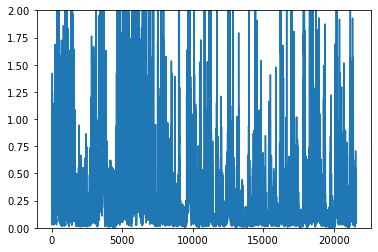

In [4]:
ax = df.motion.plot()

ax.set_ylim([0, 2])

In [12]:
freezes = detect_freezes(df.motion.values, freeze_threshold=0.28, min_duration=10)

In [13]:
np.sum(freezes)

9334.0

In [14]:
annotations = np.where(freezes == 1, "freeze", "no freeze")

In [15]:
save_anotated_video(
    source_video_path = r"D:\pilot\data\proper\B46839\D1Afternoon\cylander_behaviour\raw_bonsai_data\B46839_1_14_2021_noon1_condition_two_video.avi",
    outfile_path="tmp.avi",
    annotations=annotations
)